# <center>SENG474 Project</center>
### <center>Nero lan,Zhangze Chen,Xingyun Chen</center>
<br>

## <center>topic:heart disease prediction</center>

Import package and dataset

In [1]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split #used for split a dataser to train set and test set
from sklearn.linear_model import LogisticRegression #it is classifier problem, so we use logisticregression
from sklearn import metrics
#based on tutorial example, we can also use other classifier, such as decision tree
# from sklearn.preprocessing import XX used for preprocessing and normalize data by a simple function
dataset = pd.read_csv("heart.csv")
n_row = dataset.shape[0]
print("Number of row in heart disease dataset:" +str(n_row))
n_attribute = dataset.shape[1]-1
print("Number of attribute in heart disease dataset:" + str(n_attribute))
dataset.head()

Number of row in heart disease dataset:1025
Number of attribute in heart disease dataset:13


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Normalize before data mining

In [2]:
##TO do normalized data
##
Y = dataset['target'].values #label
X = dataset.iloc[:,:-1].values #attribute
##function comes from input Encoding slides in SENG474
x1 = (X-X.min())/(X.max()-X.min())#preprocessing method 1 将attribute都缩放到0到1 （minmaxscaler）
x2 = (X-X.mean())/(X.max()-X.min())#preprocessing method 2 和method1 差不多 缩放到-1 到 1(Maxabsscaler)
x3 = (X-X.mean())/X.std() #preprocessing method 3 标准化 z-socre

## Data Mining


In [3]:
#logistic regression method
def log_regression(X,Y,size_test):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = size_test)#split data to two sets, 80%for tranining 20% for testing
    ##logisticRegression可以帮我们把数据正则化 (penalty=l2)
    log_model = LogisticRegression(penalty='l2',solver='liblinear',multi_class ='ovr')
    log_model.fit(X_train,Y_train)
    Y_pred = log_model.predict(X_test)
    score = log_model.score(X_test,Y_test)
    return X_test, Y_test,Y_pred,score


In [4]:
print("prediction with normalized data and test size = 0.2")
X_test, Y_test,Y_pred,score = log_regression(X,Y,0.2)
print("Accurracy: "+ str(score) ) ##roger 你自己去看下score()的documentation

prediction with normalized data and test size = 0.2
Accurracy: 0.7951219512195122


# Evaluation
## Confusion metrix
cofusion metrix is the table describe the performance of a classification model

|  total |0  | 1| Predict|
|  ----  | ----  | ----|----|
| 0 |TN  | FP |
| 1  | FN | TP |
|Actual| 

In [5]:
def evaluation(Y_test,Y_pred):
# evaluation part is based on Alex's slides and sample code
    conf_m = metrics.confusion_matrix(Y_test, Y_pred)
    TP = conf_m[1, 1]
    TN = conf_m[0, 0]
    FP = conf_m[0, 1]
    FN = conf_m[1, 0]
    total_n = TP+TN+FP+FN
    print("Confusion Matrix Table:")
    print("n="+ str(total_n)+"|  0  | 1   Predict")
    print("   0 |  "+ str(TN) + " | " + str(FP))
    print("   1 |  "+ str(FN) + " | " + str(TP))
    print("Actual")

    mis_classify = 1-metrics.accuracy_score(Y_test,Y_pred)
    tpr = TP / float(TP + FN) #Sensitivity
    tnr = TN / float(TN + FP) #Specificity
    fpr = FP / float(TN + FP) #False postive rate
    fnr = TP / float(TP + FP) #Precision
    print("With Logistic Regression Model:")
    print("Misclassification Rate: " + str(mis_classify))
    print("Sensitivity:            " + str(tpr)) 
    print("Specificity:            " + str(tnr))
    print("False Postive Rate:     " + str(fpr))
    print("Precision:              " + str(fnr))
    return 0;

In [6]:
evaluation(Y_test,Y_pred)

Confusion Matrix Table:
n=205|  0  | 1   Predict
   0 |  75 | 27
   1 |  15 | 88
Actual
With Logistic Regression Model:
Misclassification Rate: 0.20487804878048776
Sensitivity:            0.8543689320388349
Specificity:            0.7352941176470589
False Postive Rate:     0.2647058823529412
Precision:              0.7652173913043478


0

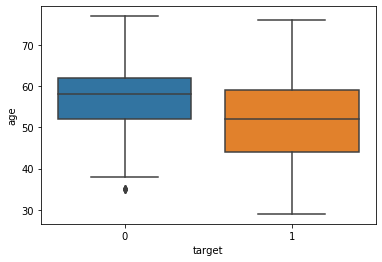

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='target',y='age',data=dataset)

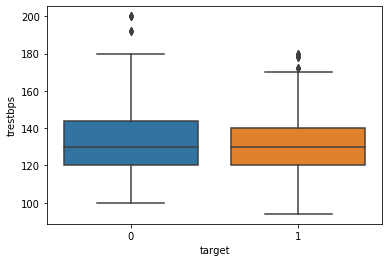

In [12]:
sns.boxplot(x='target',y='trestbps',data=dataset)

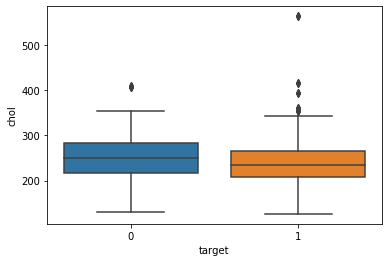

In [13]:
sns.boxplot(x='target',y='chol',data=dataset)

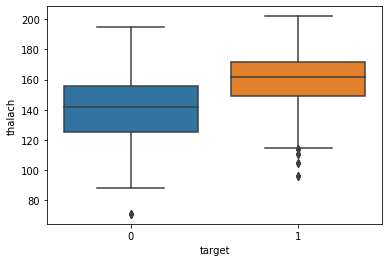

In [14]:
sns.boxplot(x='target',y='thalach',data=dataset)

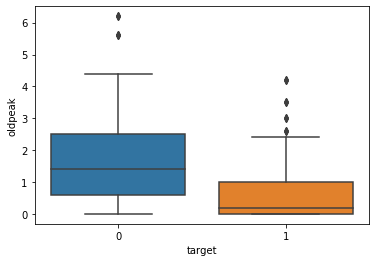

In [15]:
sns.boxplot(x='target',y='oldpeak',data=dataset)

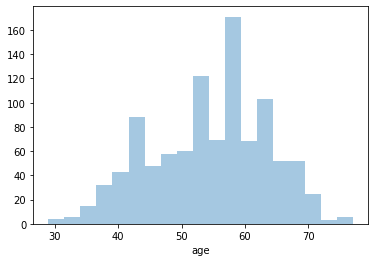

In [20]:
sns.distplot( a=dataset["age"], hist=True, kde=False, rug=False )

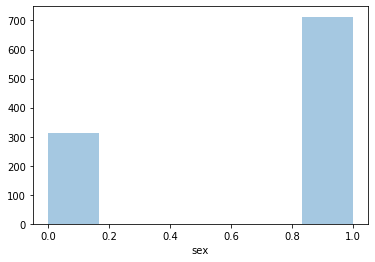

In [22]:
sns.distplot( a=dataset["sex"], hist=True, kde=False, rug=False )

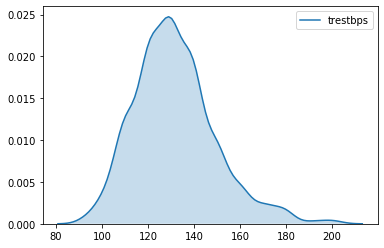

In [23]:
sns.kdeplot(dataset['trestbps'], shade=True)

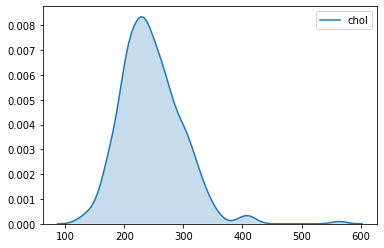

In [25]:
sns.kdeplot(dataset['chol'], shade=True)

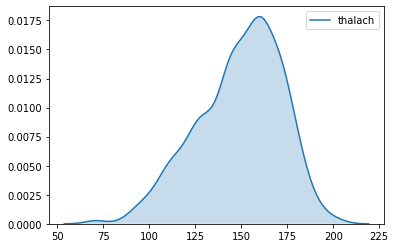

In [26]:
sns.kdeplot(dataset['thalach'], shade=True)

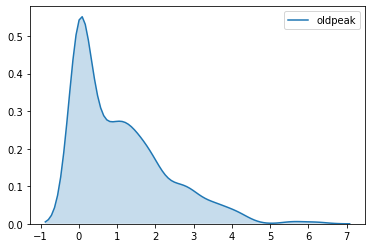

In [27]:
sns.kdeplot(dataset['oldpeak'], shade=True)

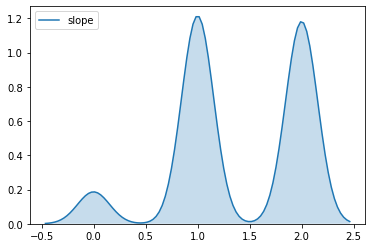

In [28]:
sns.kdeplot(dataset['slope'], shade=True)

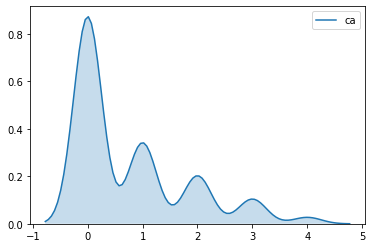

In [29]:
sns.kdeplot(dataset['ca'], shade=True)

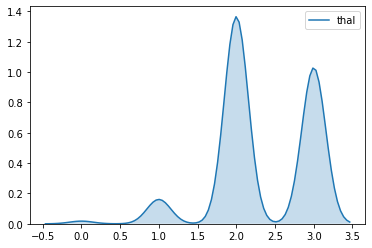

In [30]:
sns.kdeplot(dataset['thal'], shade=True)